In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
tickers = ['^GSPC','^IXIC','^GDAXI','^FTSE']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = yf.download(t, start='1997-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


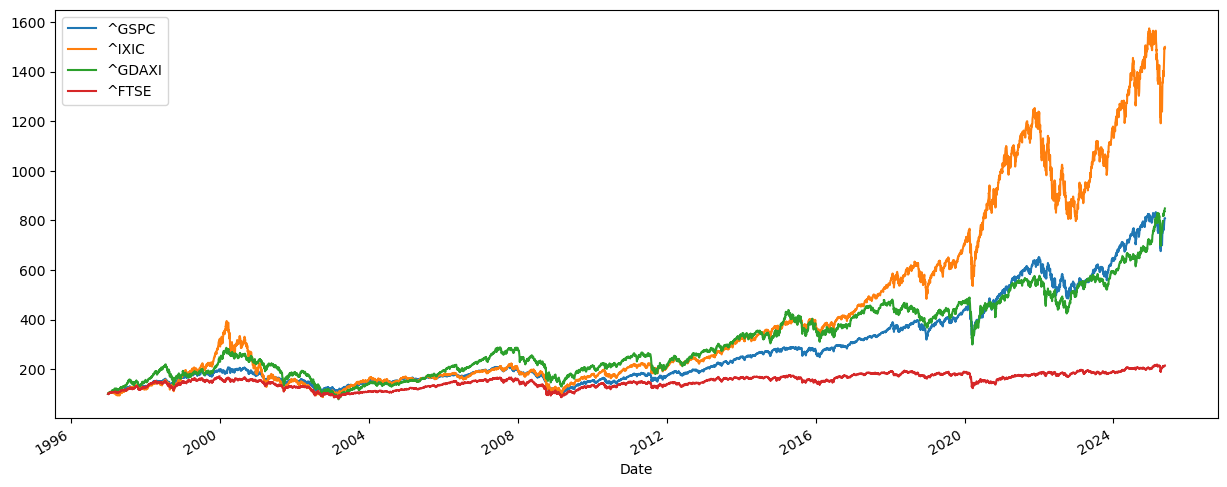

In [6]:
(ind_data/ind_data.iloc[0]*100).plot(figsize=(15,6));
plt.show()

In [7]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2025-05-13,0.007248,0.016129,0.003056,-0.000244
2025-05-14,0.001024,0.007192,-0.004719,-0.002081
2025-05-15,0.004132,-0.001801,0.007165,0.005684
2025-05-16,0.007005,0.005168,0.003032,0.005884
2025-05-19,0.000876,0.000227,0.007050,0.001693


In [8]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.092032
^IXIC     0.125950
^GDAXI    0.087396
^FTSE     0.039636
dtype: float64

In [9]:
tickers = ['PG', '^GSPC', '^DJI']
data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] = yf.download(t,start = '2007-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2025-05-14,158.020004,5892.580078,42051.058594
2025-05-15,162.410004,5916.930176,42322.750000
2025-05-16,163.279999,5958.379883,42654.738281
2025-05-19,164.770004,5963.600098,42792.070312
2025-05-20,165.199997,5943.470215,42707.738281


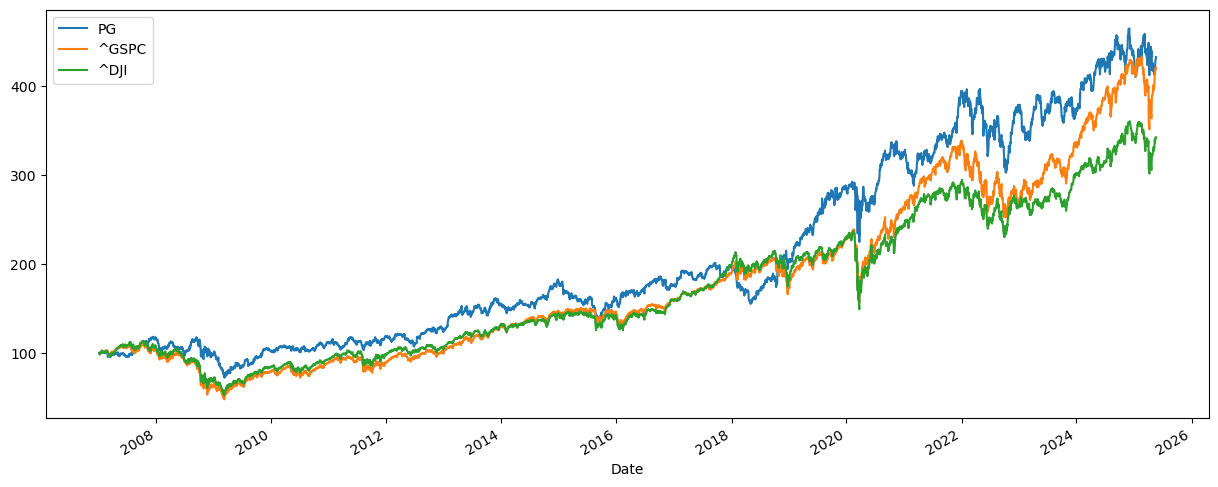

In [11]:
(data_2 / data_2.iloc[0]*100).plot(figsize = (15,6));
plt.show()

In [12]:
tickers = ['PG', 'BEI.DE']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = yf.download(t,start='2007-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
sec_data.tail()

,PG,BEI.DE
Date,,
2025-05-14,158.020004,119.349998
2025-05-15,162.410004,119.300003
2025-05-16,163.279999,119.849998
2025-05-19,164.770004,120.900002
2025-05-20,165.514999,121.550003


In [14]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [15]:
sec_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2025-05-14,-0.004483,0.000000
2025-05-15,0.027402,-0.000419
2025-05-16,0.005342,0.004600


In [16]:
sec_returns['PG'].mean()

0.00031740445989538433

In [17]:
sec_returns['PG'].mean() * 250

0.07935111497384609

In [18]:
sec_returns['PG'].std()

0.011685232730975279

In [19]:
sec_returns['PG'].std()*250**0.5

0.18475975209515733

In [20]:
print(sec_returns['PG'].mean() * 250)
print(sec_returns['BEI.DE'].mean()*250)

0.07935111497384609
0.0556737678020573


In [22]:
sec_returns[['PG','BEI.DE']].mean()*250

PG        0.079351
BEI.DE    0.055674
dtype: float64

In [23]:
sec_returns[['PG','BEI.DE']].mean()*250**0.5

PG        0.005019
BEI.DE    0.003521
dtype: float64

In [24]:
PG_var = sec_returns['PG'].var()
PG_var

0.00013654466397705595

In [25]:
BEI_var = sec_returns['BEI.DE'].var()
BEI_var

0.00018167055697274932

In [26]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.03413616599426399

In [28]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.04541763924318733

In [30]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000137,0.000041
BEI.DE,0.000041,0.000182


In [32]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.034136,0.010331
BEI.DE,0.010331,0.045418


In [34]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.261821
BEI.DE,0.261821,1.000000


In [35]:
weights = np.array([0.5,0.5])

In [36]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.025053745515242924

In [37]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.15828375000372882

In [38]:
print(str(round(pfolio_vol, 5)*100)+'%')

15.828000000000001%


In [39]:
weights[0]

0.5

In [40]:
weights[1]

0.5

In [45]:
PG_var_a = sec_returns['PG'].var()*250
PG_var_a

0.03413616599426399

In [46]:
BEI_var_a = sec_returns['BEI.DE'].var()*250
BEI_var_a

0.04541763924318733

In [47]:
dr = pfolio_var - (weights[0] ** 2 *PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

0.005165294205880095

In [49]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.01988845130936283

In [50]:
import scipy as stats
import statsmodels.api as sm

In [51]:
data = pd.read_excel('C:/Users/mjree/Desktop/Python For Finance/81 Running a Regression in Python/Python 3/Housing.xlsx')

In [52]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [53]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


In [54]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

In [55]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [56]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

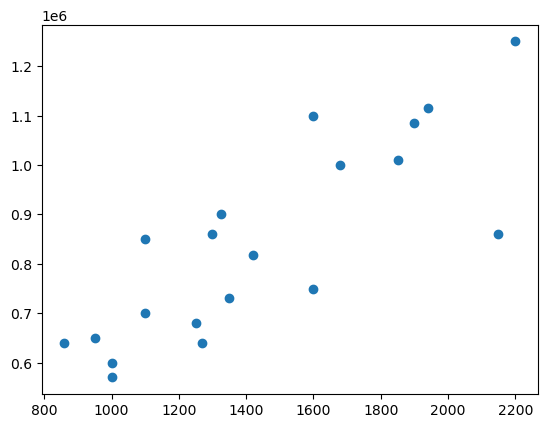

In [57]:
plt.scatter(X,Y)
plt.show()

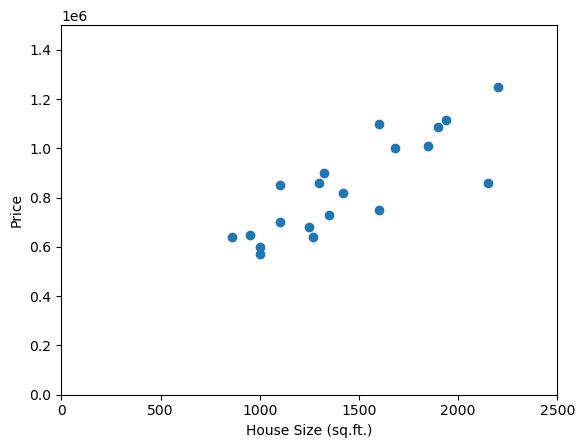

In [60]:
plt.scatter(X,Y)
plt.axis([0,2500,0,1500000])
plt.ylabel('Price')
plt.xlabel('House Size (sq.ft.)')
plt.show()

In [61]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [62]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Wed, 21 May 2025   Prob (F-statistic):           8.13e-06
Time:                        14:38:21   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
206080 + 402 * 1000

608080

In [70]:
import scipy.stats as ss
slope, intercept, r_value, p_value, std_err = ss.linregress(X,Y)

In [71]:
slope

401.91628631922595

In [72]:
intercept

260806.2360560964

In [73]:
r_value

0.8235775534696924

In [74]:
r_value ** 2

0.678279986579124

In [75]:
p_value

8.129642377231308e-06

In [76]:
std_err

65.24299510636492

In [77]:
X = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
Y = data['House Price']

In [78]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Wed, 21 May 2025   Prob (F-statistic):           6.82e-05
Time:                        15:46:08   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""